In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [18]:
def create_graphs(file_path):
    # Lê o nome da cidade
    with open(file_path, encoding='utf-8') as f:
        linhas = f.readlines()
        cidade = [l for l in linhas if "Nome:" in l][0].split(":")[1].strip()

    # Lê os dados da tabela
    df = pd.read_csv(file_path, skiprows=11, sep=';', encoding='utf-8', skipinitialspace=True)

    # Renomeia as colunas para inglês
    df.columns = ['Date', 'RainyDays', 'AvgTemperature', 'AvgWindSpeed', 'Extra']

    # Conversão dos dados
    df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
    df['RainyDays'] = pd.to_numeric(df['RainyDays'], errors='coerce')
    df['AvgTemperature'] = pd.to_numeric(df['AvgTemperature'].replace('null', np.nan), errors='coerce')

    # Cria coluna com nome do mês
    df['Month'] = df['Date'].dt.strftime('%b/%Y')

    # Garante que todos os meses estejam presentes mesmo com NaN
    full_months = pd.date_range(start="2024-01-01", end="2025-01-01", freq='M')
    df = df.set_index('Date').reindex(full_months).reset_index()
    df['Month'] = df['index'].dt.strftime('%b/%Y')
    df.rename(columns={'index': 'Date'}, inplace=True)

    # Gráfico
    fig, ax1 = plt.subplots(figsize=(14, 6))
    ax1.set_title(f'Climate Trends by Month - {cidade}')
    ax1.set_xlabel('Month')

    # Eixo da temperatura (vermelho)
    ax1.set_ylabel('Average Temperature (°C)', color='tab:red')
    ax1.plot(df['Month'], df['AvgTemperature'], color='tab:red', marker='o', label='Avg Temperature')
    ax1.tick_params(axis='y', labelcolor='tab:red')

    # Adiciona "no data" onde a temperatura for NaN
    for i, (month, temp) in enumerate(zip(df['Month'], df['AvgTemperature'])):
        if pd.isna(temp):
            ax1.annotate('no data', xy=(i, 27), xytext=(0, 5),
                        textcoords='offset points', ha='center', color='gray', fontsize=9, fontstyle='italic')

    # Eixo dos dias de chuva (azul)
    ax2 = ax1.twinx()
    ax2.set_ylabel('Rainy Days', color='tab:blue')
    ax2.bar(df['Month'], df['RainyDays'], alpha=0.3, color='tab:blue', label='Rainy Days')
    ax2.tick_params(axis='y', labelcolor='tab:blue')

    plt.xticks(rotation=45)
    fig.tight_layout()
    plt.show()


C:\Users\samue\AppData\Local\Temp\ipykernel_29196\4083709773.py:14: UserWarning: Parsing dates in %Y-%m-%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
C:\Users\samue\AppData\Local\Temp\ipykernel_29196\4083709773.py:22: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  full_months = pd.date_range(start="2024-01-01", end="2025-01-01", freq='M')


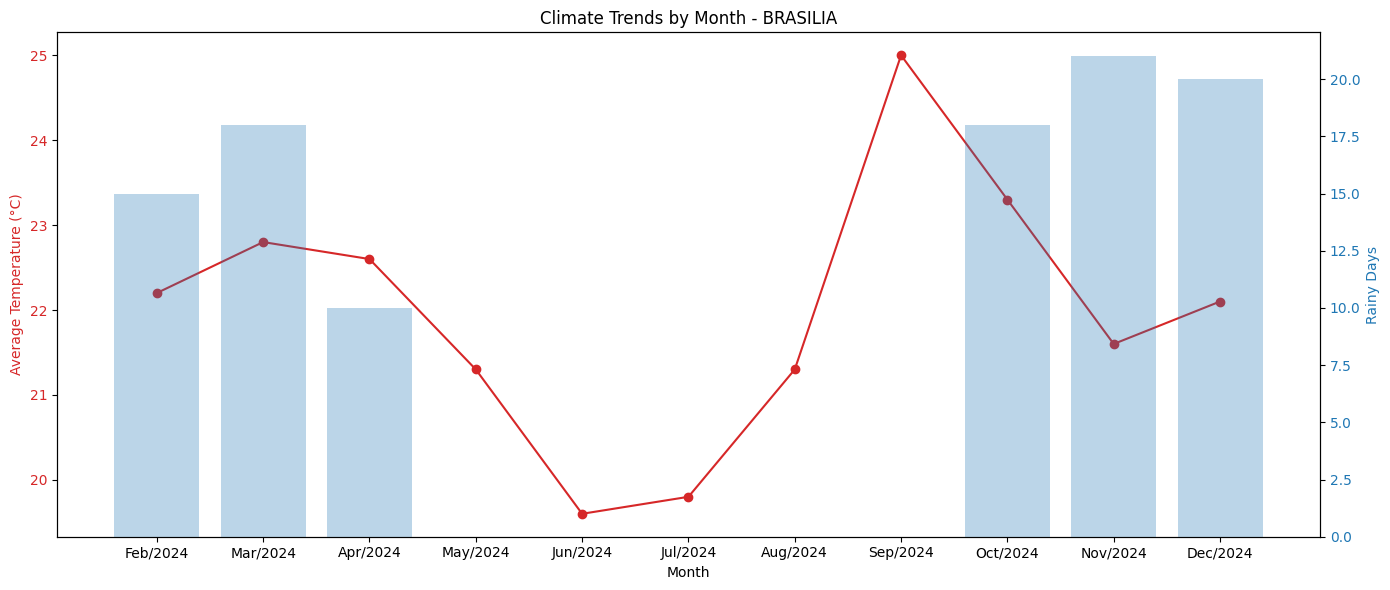

In [19]:
# File path
file_path = "../data/climate_data/dados_A001_M_2024-01-01_2025-01-01.csv"
create_graphs(file_path)

C:\Users\samue\AppData\Local\Temp\ipykernel_29196\4083709773.py:14: UserWarning: Parsing dates in %Y-%m-%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
C:\Users\samue\AppData\Local\Temp\ipykernel_29196\4083709773.py:22: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  full_months = pd.date_range(start="2024-01-01", end="2025-01-01", freq='M')


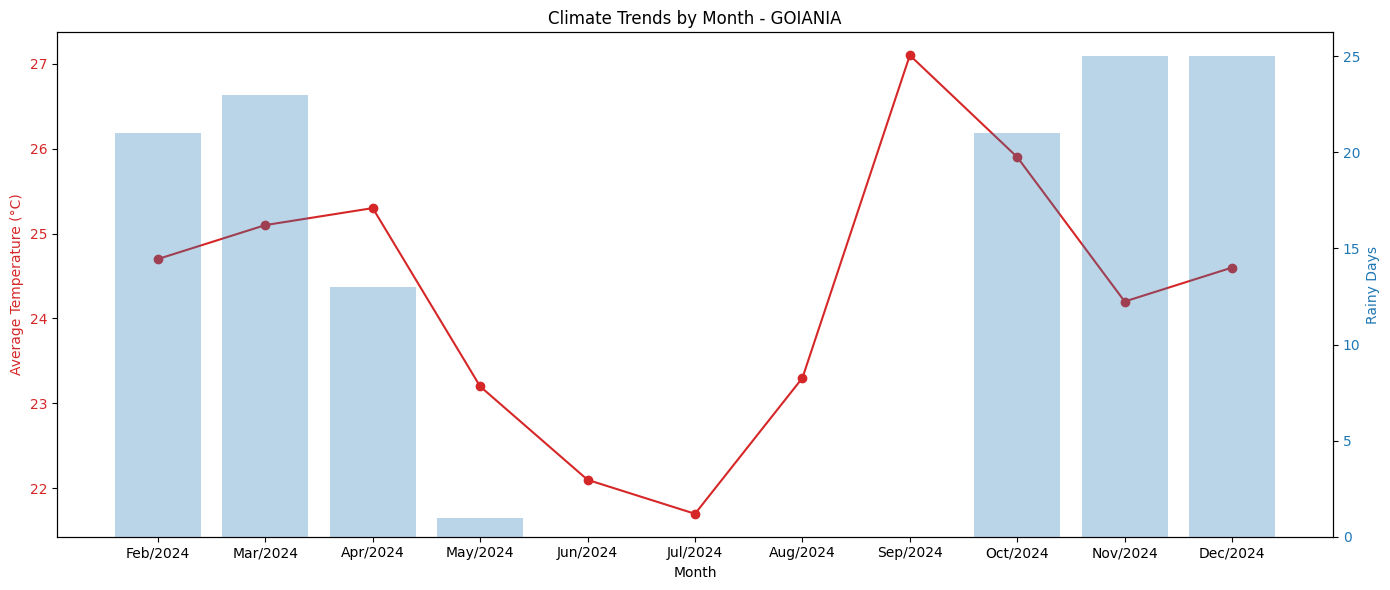

In [20]:
file_path = "../data/climate_data/dados_A002_M_2024-01-01_2025-01-01.csv"
create_graphs(file_path)

C:\Users\samue\AppData\Local\Temp\ipykernel_29196\4083709773.py:14: UserWarning: Parsing dates in %Y-%m-%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
C:\Users\samue\AppData\Local\Temp\ipykernel_29196\4083709773.py:22: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  full_months = pd.date_range(start="2024-01-01", end="2025-01-01", freq='M')


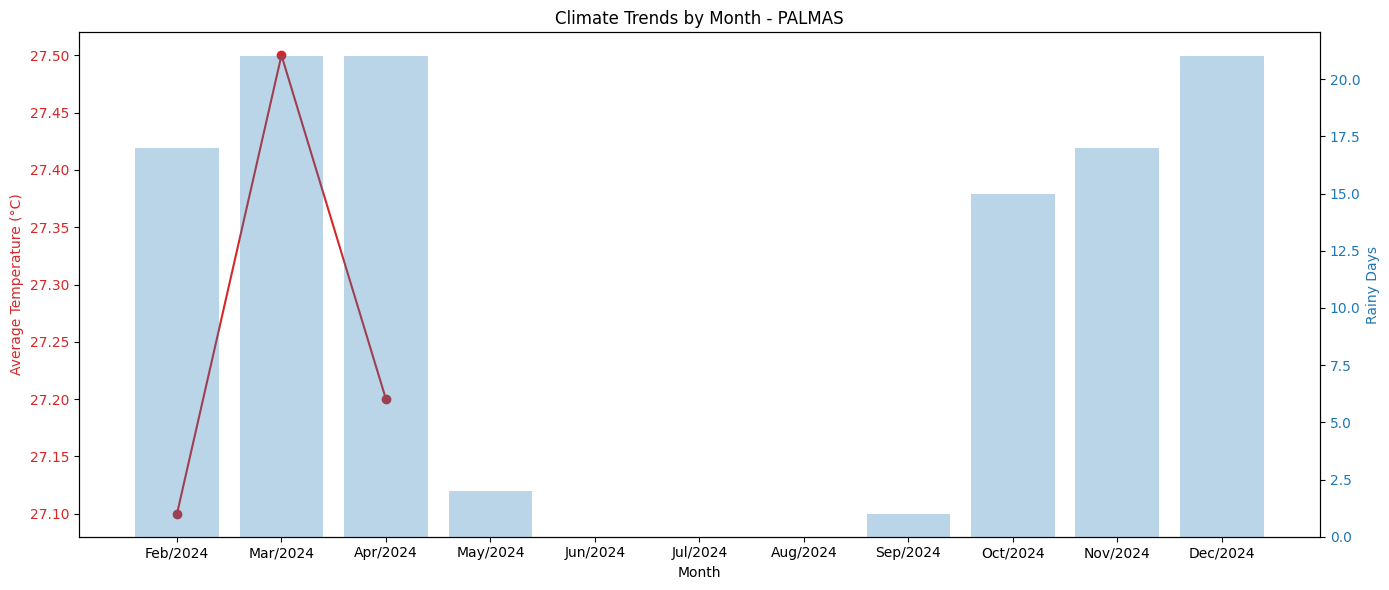

: 

In [ ]:
file_path = "../data/climate_data/dados_A009_M_2024-01-01_2025-01-01.csv"
create_graphs(file_path)


# Annual 

In [2]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Load climate data
climate_data = pd.read_csv("C:/Users/samue/OneDrive/Documents/Data-Science-Studies/Best_Cities_Remote_Work_Brazil/data/climate_summary.csv")  

# Rename columns for consistency
climate_data.columns = ['City', 'AvgPrecipitationDays', 'AvgAnnualTemp']

# Normalize the data
scaler = MinMaxScaler()
climate_df = climate_data.copy()
climate_df['NormPrecip'] = climate_data['AvgPrecipitationDays'].max() - climate_data['AvgPrecipitationDays']  # invert
climate_df['NormTemp'] = climate_data['AvgAnnualTemp']  # optional to invert if needed

climate_df[['NormPrecip', 'NormTemp']] = scaler.fit_transform(climate_df[['NormPrecip', 'NormTemp']])
climate_df['Climate Score'] = climate_df[['NormPrecip', 'NormTemp']].mean(axis=1)

# Sort by score
climate_ranking = climate_df.sort_values(by='Climate Score', ascending=False)

# Show top 5 cities by climate score
print(climate_ranking[['City', 'Climate Score']].head())


           City  Climate Score
2        Cuiaba       0.948603
0     Boa Vista       0.946337
8         Natal       0.686727
1        Manaus       0.650311
10  Porto Velho       0.622838


C:\Users\samue\AppData\Local\Temp\ipykernel_13096\333579547.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=climate_ranking, x='Climate Score', y='City', palette='coolwarm')


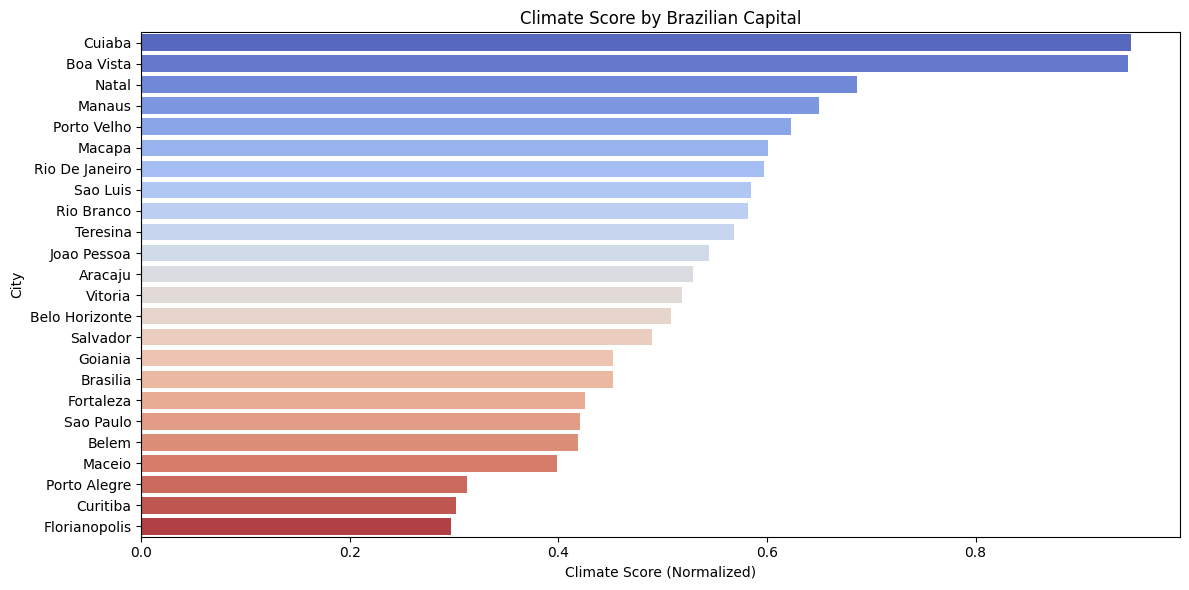

In [3]:
plt.figure(figsize=(12,6))
sns.barplot(data=climate_ranking, x='Climate Score', y='City', palette='coolwarm')
plt.title('Climate Score by Brazilian Capital')
plt.xlabel('Climate Score (Normalized)')
plt.ylabel('City')
plt.tight_layout()
plt.show()


In [7]:
import pandas as pd
import os
import glob
import numpy as np
import matplotlib.pyplot as plt

# Define the path where all your CSVs are stored
directory_path = 'C:/Users/samue/OneDrive/Documents/Data-Science-Studies/Best_Cities_Remote_Work_Brazil/data/climate_data'  # <- update this

# List to hold data for all cities
all_cities_data = []

# Loop through all CSV files
for file_path in glob.glob(os.path.join(directory_path, 'data_*.csv')):
    # Extract city name from filename
    city_name = os.path.basename(file_path).replace('data_', '').replace('.csv', '').replace('_', ' ').title()

    # Read the file content
    with open(file_path, 'r', encoding='utf-8') as f:
        lines = f.readlines()

    # Find the header line (data table start)
    header_line_index = None
    for idx, line in enumerate(lines):
        if line.startswith("Data Medicao;"):
            header_line_index = idx
            break

    if header_line_index is None:
        print(f"Skipping {file_path}: No data header found.")
        continue

    # Get data block
    data_lines = lines[header_line_index + 1:]
    data_str = ''.join(data_lines)

    # Read into DataFrame
    df = pd.read_csv(io.StringIO(data_str), sep=';', decimal='.', encoding='utf-8')
    df.replace('null', np.nan, inplace=True)
    df = df.dropna(how='all')  # Remove fully empty rows
    df = df.apply(pd.to_numeric, errors='ignore')

    # Compute mean values (ignoring NaNs)
    try:
        avg_precip = df.iloc[:, 1].astype(float).mean()
        avg_temp = df.iloc[:, 2].astype(float).mean()
        avg_wind = df.iloc[:, 3].astype(float).mean()
    except Exception as e:
        print(f"Error processing {city_name}: {e}")
        continue

    # Append results
    all_cities_data.append({
        'City': city_name,
        'Avg Precipitation Days': avg_precip,
        'Avg Annual Temperature (°C)': avg_temp,
        'Avg Wind Speed (m/s)': avg_wind
    })

# Convert to DataFrame
climate_df = pd.DataFrame(all_cities_data)

# Show results
print(climate_df.head())

             City  Avg Precipitation Days  Avg Annual Temperature (°C)  \
0         Aracaju               14.000000                    26.777778   
1           Belem               20.083333                    27.833333   
2  Belo Horizonte                9.583333                    22.741667   
3       Boa Vista                7.222222                    29.500000   
4        Brasilia                9.916667                    21.950000   

   Avg Wind Speed (m/s)  
0              2.391667  
1              1.250000  
2              1.358333  
3              2.375000  
4              2.108333  


C:\Users\samue\AppData\Local\Temp\ipykernel_13096\1310436544.py:41: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore')
C:\Users\samue\AppData\Local\Temp\ipykernel_13096\1310436544.py:41: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore')
C:\Users\samue\AppData\Local\Temp\ipykernel_13096\1310436544.py:41: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore')
C:\Users\samue\AppData\Local\Temp\ipykernel_13096\1310436544.py:41: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric witho

In [9]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Copy original dataframe
climate_scores = climate_df.copy()

# ----------- 1. Score for Precipitation (lower is better) ------------
# Normalize and invert
scaler = MinMaxScaler()
precip_scaled = scaler.fit_transform(climate_scores[['Avg Precipitation Days']])
climate_scores['Precip Score'] = 1 - precip_scaled  # Invert so lower = higher score

# ----------- 2. Score for Temperature (ideal around 20-24°C) ----------
ideal_temp = 22  # Ideal temperature
climate_scores['Temp Score'] = np.exp(-((climate_scores['Avg Annual Temperature (°C)'] - ideal_temp) ** 2) / 4)

# ----------- 3. Score for Wind Speed (ideal around 1.5 m/s) ----------
ideal_wind = 1.5
climate_scores['Wind Score'] = np.exp(-((climate_scores['Avg Wind Speed (m/s)'] - ideal_wind) ** 2) / 2)

# ----------- 4. Final Climate Score ------------
climate_scores['Climate Score'] = climate_scores[['Precip Score', 'Temp Score', 'Wind Score']].mean(axis=1)

# ----------- 5. Ranking ------------
climate_scores_sorted = climate_scores.sort_values(by='Climate Score', ascending=False)

# Display top cities with best climate conditions
print(climate_scores_sorted[['City', 'Avg Precipitation Days', 'Avg Annual Temperature (°C)',
                             'Avg Wind Speed (m/s)', 'Climate Score']].head(10))


              City  Avg Precipitation Days  Avg Annual Temperature (°C)  \
22       Sao Paulo               10.750000                    21.650000   
2   Belo Horizonte                9.583333                    22.741667   
4         Brasilia                9.916667                    21.950000   
7    Florianopolis               12.400000                    21.437500   
5           Cuiaba                5.166667                    28.466667   
16    Porto Alegre               13.333333                    20.433333   
19  Rio De Janeiro                7.750000                    24.287500   
6         Curitiba               11.166667                    19.308333   
15          Palmas               11.166667                    27.266667   
17     Porto Velho               11.142857                    26.814286   

    Avg Wind Speed (m/s)  Climate Score  
22              1.641667       0.861851  
2               1.358333       0.855148  
4               2.108333       0.837338  
7     

C:\Users\samue\AppData\Local\Temp\ipykernel_13096\237236296.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(data=climate_scores_sorted, x='Climate Score', y='City', palette='coolwarm', ci='sd')
C:\Users\samue\AppData\Local\Temp\ipykernel_13096\237236296.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=climate_scores_sorted, x='Climate Score', y='City', palette='coolwarm', ci='sd')


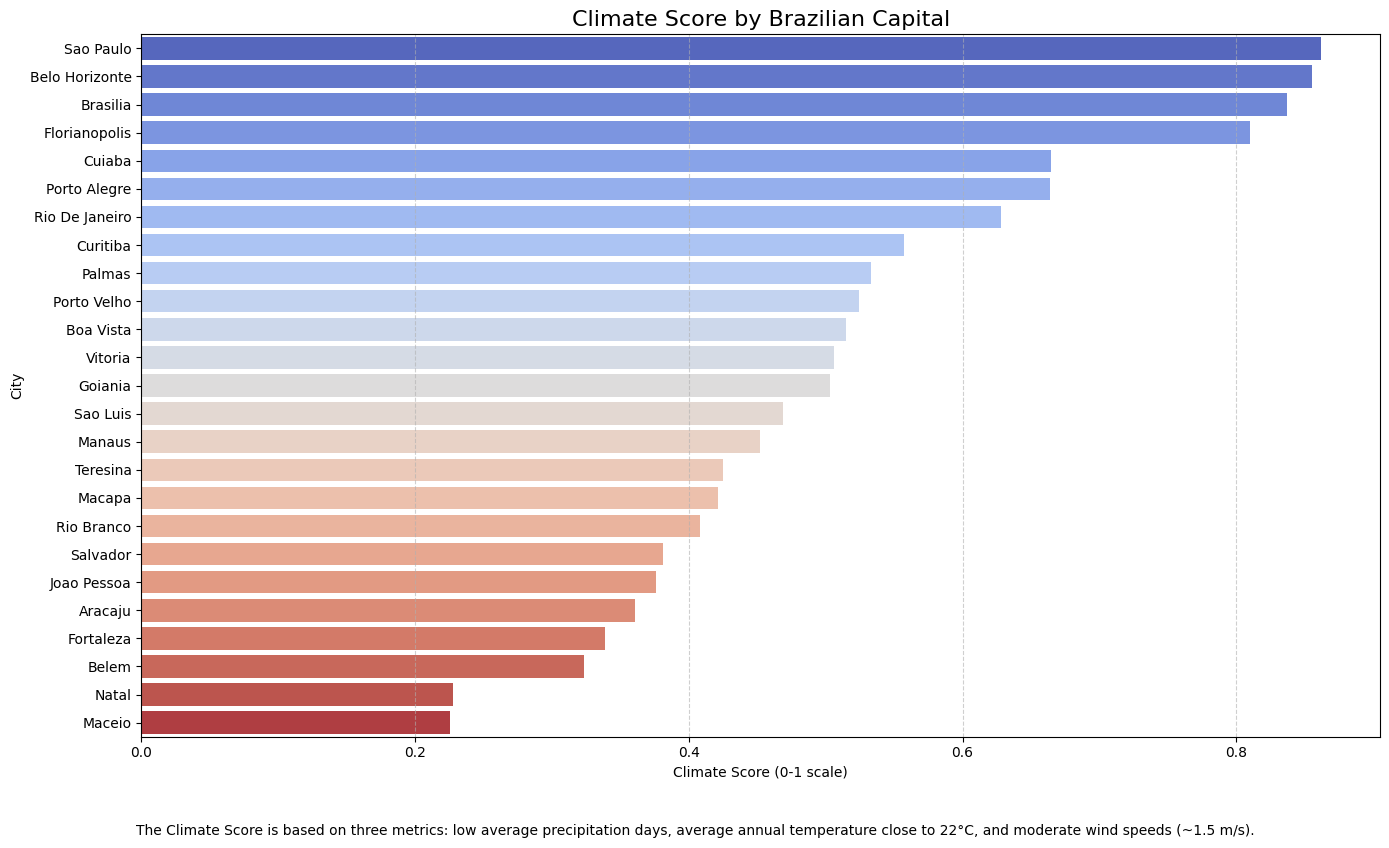

In [10]:
plt.figure(figsize=(14, 8))
sns.barplot(data=climate_scores_sorted, x='Climate Score', y='City', palette='coolwarm', ci='sd')
plt.title('Climate Score by Brazilian Capital', fontsize=16)
plt.xlabel('Climate Score (0-1 scale)')
plt.ylabel('City')
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Caption
plt.figtext(0.5, -0.05,
            "The Climate Score is based on three metrics: low average precipitation days, average annual temperature close to 22°C, and moderate wind speeds (~1.5 m/s).",
            wrap=True, horizontalalignment='center', fontsize=10)

plt.tight_layout()
plt.show()